Name: Abhishek Sahu
Regd. No: 2241019164
sec: 07
Sub: DSW 2

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from word2number import w2n

In [ ]:
Types of Regression Techniques:
1.Linear Regression
2.Polynomial Regression
3.Decision Tree Regression
4.Random Forest Regression
5.Support Vector Regression
6.Ridge Regression
7.Lasso Regression

So, here we're going to see how Ridge and lasso regression works.

#### Ridge Regression

Ridge Regression ( or L2 Regularization ) is a variation of Linear Regression. It is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. In Linear Regression, it minimizes the Residual Sum of Squares ( or RSS or cost function ) to fit the training examples perfectly as possible. The cost function is also represented by J.
Cost Function for Linear Regression: costf=1/m*sum((h(x(i))- y(i))**2)

Here, (h(x(i)) represents the hypothetical function for prediction. y(i) represents the value of target variable for ith example. m is the total number of training examples in the given dataset. Linear regression treats all the features equally and finds unbiased weights to minimizes the cost function. This could arise the problem of overfitting. In Ridge Regression, there is an addition of l2 penalty ( square of the magnitude of weights ) in the cost function of Linear Regression. This is done so that the model does not overfit the data.
The Modified cost function for Ridge Regression is given below:  costf=1/m*sum(((h(x(i))- y(i))**2)+ lamda*sum(w(j)**2)) -->sum from j=1 to n

Here, w(j) represents the weight for jth feature. n is the number of features in the dataset. l2 penalty term leads to reduces the weights of the model to zero or close to zero. Due to the penalization of weights, our hypothesis gets simpler, more generalized, and less prone to overfitting. All weights are reduced by the same factor lambda. We can control the strength of regularization by hyperparameter lambda. Different cases for tuning values of lambda.
1.If lambda is set to be 0, Ridge Regression equals Linear Regression
2.If lambda is set to be infinity, all weights are shrunk to zero.

In [62]:
def predict(x,theta):
    prediction=np.dot(x,theta)
    return prediction
def error(x,y,theta):
    return (y-predict(x,theta))
def costf(x,y,theta):
    e=0
    lmd=10000
    for i in range(len(x)):
        e=e+error(x[i],y[i],theta)**2+ lmd*theta[i]**2
    return e/(2*len(x))
def gradient(x,y,theta):
    temp=[]
    for j in range(len(x[0])):
        theta_j=0
        for i in range(len(x)):
            theta_j=theta_j+(x[i][j]*error(x[i],y[i],theta))
        temp.append(theta_j)
    return temp

In [64]:
def grad_descent(x,y,theta):
    theta=np.zeros((len(x[0]),1))
    e=[]
    it=[]
    i=0
    prevc, curc=1, 0
    while abs(curc-prevc)>0.001:
        prevc=costf(x,y,theta)
        theta=theta+(np.array(gradient(x,y,theta))*0.01)
        curc=costf(x,y,theta)
        e.append(curc)
        i+=1
        it.append(i)
    print('after',i,' no. of iteration','m:') 
    return theta
x=[[1,2,3],[1,4,5]]
y=[2,5]
theta=[1,1,1]
grad_descent(x,y,theta)

after 4777  no. of iteration m:


array([[-1.16662247],
       [ 1.33330244],
       [ 0.16667997]])

#### Lasso regression

Similarly, In lasso regression ( or L1 Regularization ) is a another variation of Linear Regression. It is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage.
The Cost Function for Linear Regression: costf=1/m*sum((h(x(i))- y(i))**2)

Here, (h(x(i)) represents the hypothetical function for prediction. y(i) represents the value of target variable for ith example. m is the total number of training examples in the given dataset. In Lasso Regression, there is an addition of l1 penalty ( or equal to the absolute value of the magnitude of weights) in the cost function of Linear Regression. 
The Modified cost function for Ridge Regression is given below:  costf=1/m*sum(((h(x(i))- y(i))**2)+ lamda*sum(w(j))) -->sum from j=1 to n

In [65]:
def predict(x,theta):
    prediction=np.dot(x,theta)
    return prediction
def error(x,y,theta):
    return (y-predict(x,theta))
def costf(x,y,theta):
    e=0
    lmd=10000
    for i in range(len(x)):
        e=e+error(x[i],y[i],theta)**2+ lmd*abs(theta[i])
    return e/(2*len(x))
def gradient(x,y,theta):
    temp=[]
    for j in range(len(x[0])):
        theta_j=0
        for i in range(len(x)):
            theta_j=theta_j+(x[i][j]*error(x[i],y[i],theta))
        temp.append(theta_j)
    return temp

In [67]:
def grad_descent(x,y,theta):
    theta=np.zeros((len(x[0]),1))
    e=[]
    it=[]
    i=0
    prevc, curc=1, 0
    while abs(curc-prevc)>0.001:
        prevc=costf(x,y,theta)
        theta=theta+(np.array(gradient(x,y,theta))*0.01)
        curc=costf(x,y,theta)
        e.append(curc)
        i+=1
        it.append(i)
    print('after',i,' no. of iteration','m:') 
    return theta
x=[[1,2,3],[1,4,5]]
y=[2,5]
theta=[1,1,1]
grad_descent(x,y,theta)

after 4357  no. of iteration m:


array([[-1.16655747],
       [ 1.33325701],
       [ 0.16669954]])

In [68]:
#using dataset
df=pd.read_csv(r"C:\Users\sahua\OneDrive\Documents\Data Science\hiring.csv")
df.experience=df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [69]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [70]:
import math
mean_ts = math.floor(df['test_score(out of 10)'].mean())
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_ts)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [71]:
df.isna().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

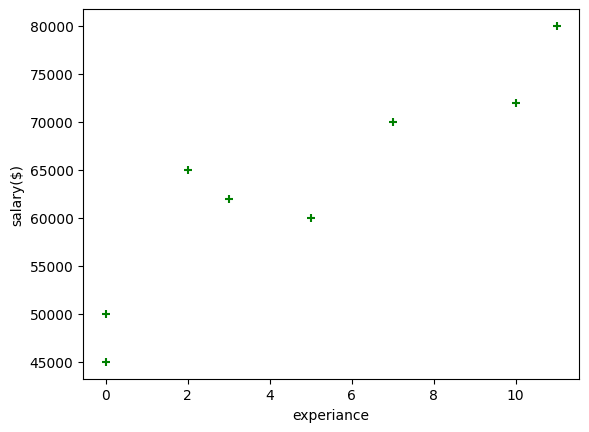

In [72]:
plt.xlabel("experiance")
plt.ylabel("salary($)")
plt.scatter(df.experience,df['salary($)'],color="green",marker="+")

In [75]:
x=df.drop('salary($)',axis=1)
y=df['salary($)']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [77]:
reg.score(x_test,y_test)

0.914964218075345

In [82]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [83]:
lasso_reg.score(x_test,y_test)

0.8945282413384297

In [85]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [86]:
ridge_reg.score(x_test,y_test)

-0.13851770081199466

How does Lasso Regression differ from Ridge Regression?

sol-> To prevent overfitting, regularization terms are introduced in both Lasso and Ridge Regression models; however, the kind of regularization used varies. In order to pick features, Lasso utilizes an L1 penalty, which drives some coefficients exactly to zero, whereas Ridge uses an L2 penalty, which decreases all coefficients towards zero.